In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import re
import unicodedata

In [ ]:
df = pd.read_csv("/content/rdatascience_submission_comments_df.csv", index_col=[0])
df['body'] = df['body'].astype('str')
df['body']

0                           I think it’s just a bad time.
1       I’m on the hunt as well atm but with 3 YOE and...
2       Data engineering is not really a natural progr...
3       If you haven't yet check out r/dataengineering...
4       Contractor at FAANg is definitely not somethin...
                              ...                        
1136    In most cases, the company extends these offer...
1137    I wanna hear more about the consultant route o...
1138    My thought process was if a company is willing...
1139                                             Yea sure
1140    An intern is temporary. A minor waste of resou...
Name: body, Length: 1141, dtype: object

In [ ]:
# remove HTML links and special characters
# choose functions that suit your neeeds

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ' ')
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def process_posts(post):
    post = strip_links(post)
    post = remove_special_characters(post)
    return post

df.loc[:, 'body'] = df.body.apply(process_posts)

In [ ]:
text = ' '.join(df.body.tolist()).lower()

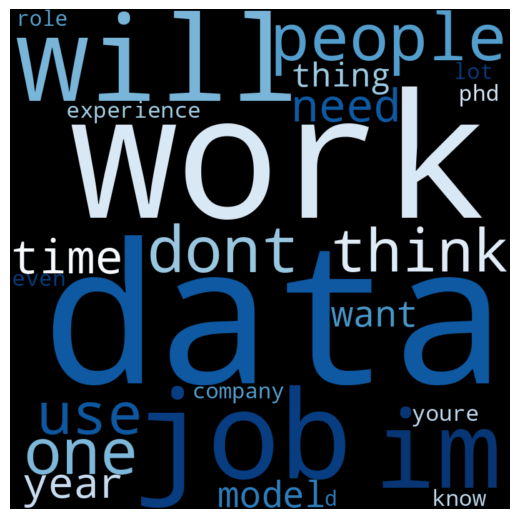

In [ ]:
# create the wordcloud object
wordcloud = WordCloud(width = 800, height = 800,
                #background_color ='white',
                stopwords = STOPWORDS,
                max_words=25,
                colormap='Blues', # Blues
                collocations = True,
                prefer_horizontal=1.0,
                min_font_size = 10).generate(text)

# plot word cloud
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.margins(x=0, y=0)
plt.axis("off")
plt.tight_layout(pad = 0)